<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/03_CNN_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

## Get the data

In [2]:
url_zip = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'

In [3]:
import zipfile

In [4]:
!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'

--2023-06-19 15:02:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.128, 142.250.97.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   107MB/s    in 1.0s    

2023-06-19 15:02:18 (107 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [5]:
zip_ref = zipfile.ZipFile('pizza_steak.zip')

In [6]:
zip_ref.extractall()
zip_ref.close()

## Inspect data

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

In [8]:
!ls pizza_steak

test  train


In [9]:
!ls pizza_steak/train

pizza  steak


In [10]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [11]:
import os

In [12]:
for path,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} and {len(filenames)} images in {path}")

There are 2 and 0 images in pizza_steak
There are 2 and 0 images in pizza_steak/train
There are 0 and 750 images in pizza_steak/train/pizza
There are 0 and 750 images in pizza_steak/train/steak
There are 2 and 0 images in pizza_steak/test
There are 0 and 250 images in pizza_steak/test/pizza
There are 0 and 250 images in pizza_steak/test/steak


In [13]:
num_files = len(os.listdir("pizza_steak/train/pizza"))
print(num_files)

750


In [14]:
steak_images = os.listdir("pizza_steak/train/steak")

In [15]:
import pathlib
datadir = pathlib.Path("pizza_steak/train/")
class_names = np.array([item.name for item in datadir.glob('*')])
class_names

array(['pizza', 'steak'], dtype='<U5')

In [16]:
def view_random_image(target_dir, target_class):
  target_folder = os.path.join(target_dir, target_class)
  image_file = random.sample(os.listdir(target_folder),1)[0]
  image_arr = mpimg.imread(os.path.join(target_folder, image_file))

  plt.imshow(image_arr)
  plt.title(target_class)
  plt.axis("off")
  print(f"Shape of image{image_arr.shape}")
  plt.show()

Shape of image(384, 512, 3)


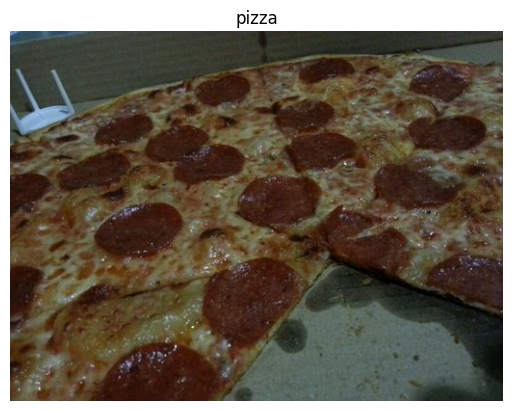

In [17]:
view_random_image("pizza_steak/test/", "pizza")

Shape of image(382, 512, 3)


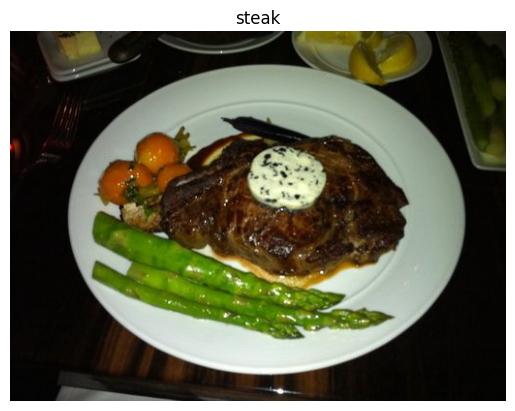

In [18]:
view_random_image("pizza_steak/train/", "steak")

## Normalization of data
NN preffers data between 0 to 1

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
tf.random.set_seed(42)

In [21]:
train_datagenerator = ImageDataGenerator(rescale=1./255)
test_imagegererator = ImageDataGenerator(rescale=1./255)

In [22]:
train_data_path = '/content/pizza_steak/train'
test_data_path = '/content/pizza_steak/test'

In [23]:
train_data = train_datagenerator.flow_from_directory(
    train_data_path,
    batch_size = 32,
    target_size = (224,224),
    class_mode = 'binary',
    seed = 44)

Found 1500 images belonging to 2 classes.


In [24]:
test_data = test_imagegererator.flow_from_directory(
    test_data_path,
    batch_size = 32,
    target_size = (224,224),
    class_mode = 'binary',
    seed = 44)

Found 500 images belonging to 2 classes.


### Create CNN using **Tiny VVG archeticture**

In [25]:
from tensorflow import keras

In [26]:
# test maxpool layer
x = tf.constant([[[5,6,7],[8,9,10]]])
x = tf.reshape(x, (1,2,3,1))
x

<tf.Tensor: shape=(1, 2, 3, 1), dtype=int32, numpy=
array([[[[ 5],
         [ 6],
         [ 7]],

        [[ 8],
         [ 9],
         [10]]]], dtype=int32)>

In [27]:
max_valid = tf.nn.max_pool(x, ksize = 2, strides = 1, padding = "VALID")
max_valid

<tf.Tensor: shape=(1, 1, 2, 1), dtype=int32, numpy=
array([[[[ 9],
         [10]]]], dtype=int32)>

In [28]:
max_same = tf.nn.max_pool(x, ksize = 2, strides = 1, padding = "SAME")
max_same

<tf.Tensor: shape=(1, 2, 3, 1), dtype=int32, numpy=
array([[[[ 9],
         [10],
         [10]],

        [[ 9],
         [10],
         [10]]]], dtype=int32)>

In [29]:
xx = tf.constant([[[5,6,7],[8,9,10]]])
print(xx)
l = keras.layers.MaxPool1D(pool_size=2, padding='valid', data_format="channels_first")
print(l(xx))

tf.Tensor(
[[[ 5  6  7]
  [ 8  9 10]]], shape=(1, 2, 3), dtype=int32)
tf.Tensor(
[[[6]
  [9]]], shape=(1, 2, 1), dtype=int32)


In [30]:
xx = tf.constant([[[5,6,7],[8,9,10]]])
print(xx)
l = keras.layers.MaxPool1D(pool_size=2, padding='same', data_format="channels_first")
print(l(xx))

tf.Tensor(
[[[ 5  6  7]
  [ 8  9 10]]], shape=(1, 2, 3), dtype=int32)
tf.Tensor(
[[[ 6  7]
  [ 9 10]]], shape=(1, 2, 2), dtype=int32)


In [31]:
model_l = keras.models.Sequential((
    keras.layers.Conv2D(filters=10,
                        kernel_size=(3,3),
                        activation='relu',
                        input_shape=(224,224,3)),
    keras.layers.Conv2D(10,3,activation='relu'),
    keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    keras.layers.Conv2D(10,3,activation='relu'),
    keras.layers.Conv2D(10,3,activation='relu'),
    keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(1, 'sigmoid')
))

In [32]:
model_l.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [33]:
history_l = model_l.fit(train_data,
                        epochs =6,
                        steps_per_epoch = len(train_data), ## this set for infnity repeat dataset
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/6
47/47 [==============================] - 149s 3s/step - loss: 0.5763 - accuracy: 0.6887 - val_loss: 0.4242 - val_accuracy: 0.8400
Epoch 2/6
47/47 [==============================] - 147s 3s/step - loss: 0.4391 - accuracy: 0.8047 - val_loss: 0.4438 - val_accuracy: 0.8000
Epoch 3/6
47/47 [==============================] - 166s 4s/step - loss: 0.3940 - accuracy: 0.8273 - val_loss: 0.3333 - val_accuracy: 0.8760
Epoch 4/6
47/47 [==============================] - 139s 3s/step - loss: 0.3423 - accuracy: 0.8587 - val_loss: 0.3174 - val_accuracy: 0.8660
Epoch 5/6
47/47 [==============================] - 139s 3s/step - loss: 0.2728 - accuracy: 0.8860 - val_loss: 0.4511 - val_accuracy: 0.8060
Epoch 6/6
47/47 [==============================] - 130s 3s/step - loss: 0.2095 - accuracy: 0.9180 - val_loss: 0.3435 - val_accuracy: 0.8520


In [34]:
model_l.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [35]:
import pandas as pd

<Axes: >

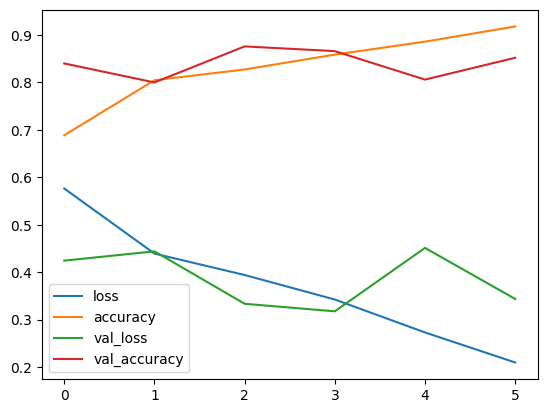

In [36]:
pd.DataFrame(history_l.history).plot()

### Show image in each layers

In [37]:
x, y = test_data.next()

shape of image (224, 224, 3)


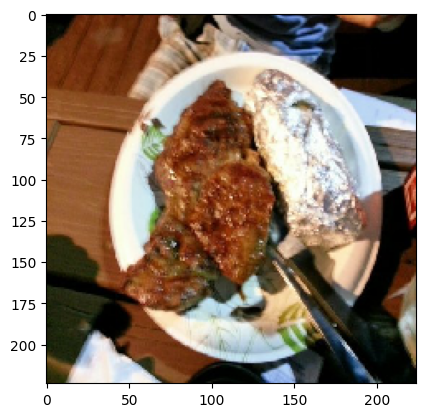

In [38]:
plt.imshow(x[0])
print(f"shape of image {x[0].shape}")

In [39]:
layers_outputs = [l.output for l in model_l.layers]

In [40]:
layers_outputs

[<KerasTensor: shape=(None, 222, 222, 10) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 220, 220, 10) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 110, 110, 10) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 108, 108, 10) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 106, 106, 10) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 53, 53, 10) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 28090) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense')>]

In [41]:
activation_model = tf.keras.models.Model(inputs = model_l.input, outputs = layers_outputs)

In [42]:
activation_model.output_shape

[(None, 222, 222, 10),
 (None, 220, 220, 10),
 (None, 110, 110, 10),
 (None, 108, 108, 10),
 (None, 106, 106, 10),
 (None, 53, 53, 10),
 (None, 28090),
 (None, 1)]

In [43]:
f1 = activation_model.predict(x[0].reshape(1,224,224,3))

1/1 [==============================] - 0s 218ms/step


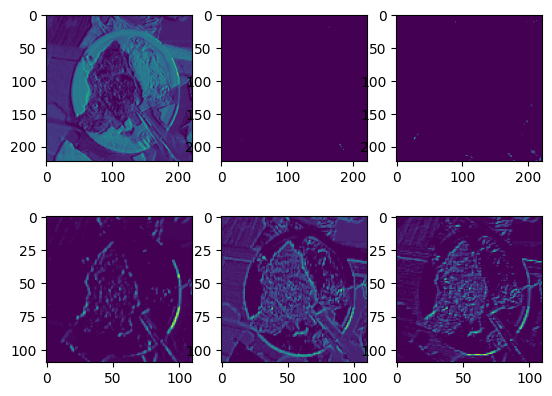

In [44]:
f, axarr = plt.subplots(2,3)
axarr[0,0].imshow(f1[0][0,: , :,0])
axarr[0,0].grid(False)
axarr[0,1].imshow(f1[0][0,: , :,1])
axarr[0,1].grid(False)
axarr[0,2].imshow(f1[0][0,: , :,7])
axarr[0,2].grid(False)
axarr[1,0].imshow(f1[2][0,: , :,0])
axarr[1,0].grid(False)
axarr[1,1].imshow(f1[2][0,: , :,1])
axarr[1,1].grid(False)
axarr[1,2].imshow(f1[2][0,: , :,7])
axarr[1,2].grid(False)

## Create Data Augmentation

In [105]:
train_datagen_augmentation = ImageDataGenerator(rescale = 1./255,
                                                rotation_range = 0.2,
                                                shear_range = 0.2,
                                                zoom_range = 0.2,
                                                width_shift_range = 0.2,
                                                height_shift_range = 0.3,
                                                horizontal_flip = 0.3)
train_original_data = ImageDataGenerator(rescale = 1./255)

In [106]:
train_data_augmented = train_datagen_augmentation.flow_from_directory(
    train_data_path,
    batch_size = 32,
    target_size = (224,224),
    class_mode = 'binary',
    shuffle = False)

train_data_original = train_original_data.flow_from_directory(
    train_data_path,
    batch_size = 32,
    target_size = (224,224),
    class_mode = 'binary',
    shuffle = False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [107]:
data, labels = train_data_augmented.next()

In [108]:
original_data, or_labels = train_data_original.next()

In [109]:
data.shape, original_data.shape

((32, 224, 224, 3), (32, 224, 224, 3))

In [110]:
type(data)

numpy.ndarray

In [111]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

Class id 0.0
Class id 0.0


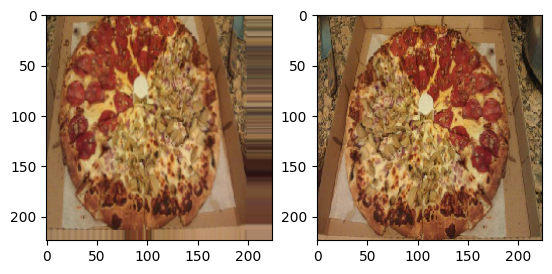

In [115]:
i = random.randint(0,31)
plt.subplot(1,2,1)
plt.imshow(data[i])
print(f"Class id {labels[i]}")
plt.subplot(1,2,2)
plt.imshow(original_data[i])
print(f"Class id {or_labels[i]}")

plt.show()

In [116]:
model_l.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])
history_augmentation = model_l.fit(train_data_augmented,
                        epochs =6,
                        steps_per_epoch = len(train_data_augmented), ## this set for infnity repeat dataset
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/6
47/47 [==============================] - 153s 3s/step - loss: 0.7059 - accuracy: 0.6547 - val_loss: 0.4075 - val_accuracy: 0.8300
Epoch 2/6
47/47 [==============================] - 144s 3s/step - loss: 0.5254 - accuracy: 0.7373 - val_loss: 0.4941 - val_accuracy: 0.7380
Epoch 3/6
47/47 [==============================] - 152s 3s/step - loss: 0.5114 - accuracy: 0.7513 - val_loss: 0.3390 - val_accuracy: 0.8640
Epoch 4/6
47/47 [==============================] - 151s 3s/step - loss: 0.5393 - accuracy: 0.7400 - val_loss: 0.3514 - val_accuracy: 0.8580
Epoch 5/6
47/47 [==============================] - 151s 3s/step - loss: 0.5440 - accuracy: 0.7540 - val_loss: 0.3702 - val_accuracy: 0.8520
Epoch 6/6
47/47 [==============================] - 150s 3s/step - loss: 0.6540 - accuracy: 0.6973 - val_loss: 0.3639 - val_accuracy: 0.8680


<Axes: >

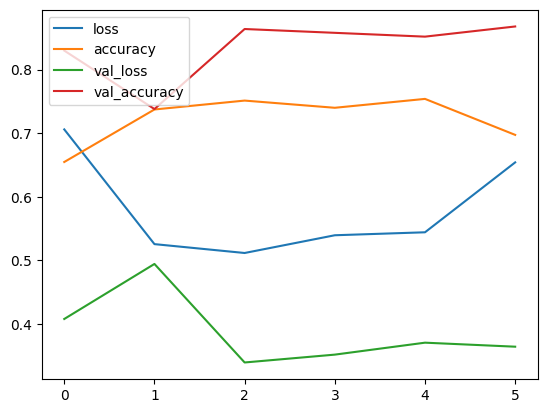

In [117]:
pd.DataFrame(history_augmentation.history).plot()

In [118]:
train_data_augmented_shuffle = train_datagen_augmentation.flow_from_directory(
    train_data_path,
    batch_size = 32,
    target_size = (224,224),
    class_mode = 'binary',
    shuffle = True)

model_l.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])
history_augmentation = model_l.fit(train_data_augmented_shuffle,
                        epochs =6,
                        steps_per_epoch = len(train_data_augmented_shuffle), ## this set for infnity repeat dataset
                        validation_data = test_data,
                        validation_steps = len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/6
47/47 [==============================] - 155s 3s/step - loss: 0.4842 - accuracy: 0.7713 - val_loss: 0.3536 - val_accuracy: 0.8480
Epoch 2/6
47/47 [==============================] - 150s 3s/step - loss: 0.4786 - accuracy: 0.7853 - val_loss: 0.3138 - val_accuracy: 0.8760
Epoch 3/6
47/47 [==============================] - 144s 3s/step - loss: 0.4471 - accuracy: 0.8007 - val_loss: 0.3573 - val_accuracy: 0.8480
Epoch 4/6
47/47 [==============================] - 144s 3s/step - loss: 0.4276 - accuracy: 0.8253 - val_loss: 0.2949 - val_accuracy: 0.8640
Epoch 5/6
47/47 [==============================] - 151s 3s/step - loss: 0.4207 - accuracy: 0.8073 - val_loss: 0.3709 - val_accuracy: 0.8400
Epoch 6/6
47/47 [==============================] - 150s 3s/step - loss: 0.4556 - accuracy: 0.7933 - val_loss: 0.3612 - val_accuracy: 0.8460


<Axes: >

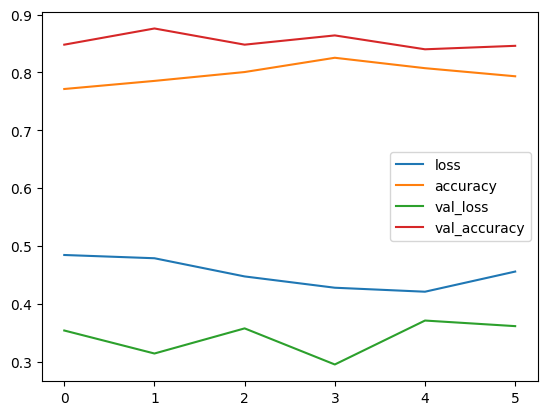

In [119]:
pd.DataFrame(history_augmentation.history).plot()

In [120]:
## Predict a custom image

In [133]:
!wget 'https://github.com/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/03-steak.jpeg'

--2023-06-19 16:45:41--  https://github.com/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/03-steak.jpeg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg           [ <=>                ] 139.34K  --.-KB/s    in 0.04s   

2023-06-19 16:45:41 (3.45 MB/s) - ‘03-steak.jpeg’ saved [142687]



In [135]:
import matplotlib.image as mpimg

(4032, 3024, 3)


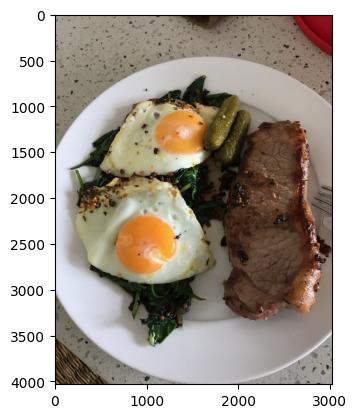

In [138]:
steak_img = mpimg.imread('/content/03-steak.jpeg')
print(steak_img.shape)
plt.imshow(steak_img)
plt.show()

In [142]:
model_l.predict(tf.expand_dims(steak_img, axis = 0))

ValueError: ignored

In [ ]:
img_file = tf.io.read_file('/content/03-steak.jpeg')

In [150]:
def read_and_reshape_image(file_name, shape = 224):
  f = tf.io.read_file(file_name)
  img = tf.image.decode_image(f)
  img = tf.image.resize(img, size = [shape, shape])
  img = img/255.
  return img

(224, 224, 3)


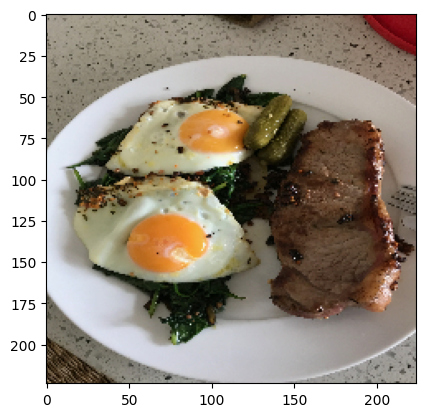

In [151]:
steak_reshape = read_and_reshape_image('/content/03-steak.jpeg')
print(steak_reshape.shape)
plt.imshow(steak_reshape)

In [ ]:
steak_reshape

In [155]:
predict = model_l.predict(tf.expand_dims(steak_reshape, axis = 0))

1/1 [==============================] - 0s 72ms/step


In [156]:
predict

array([[0.9499104]], dtype=float32)

In [154]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [158]:
pred_class = class_names[int(tf.round(predict))]

In [159]:
pred_class

'steak'

In [161]:
int(tf.round(predict))

1

(224, 224, 3)


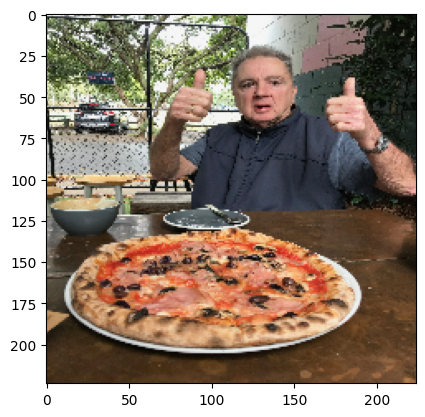

In [165]:
pizza_reshape = read_and_reshape_image('/content/03-pizza-dad.jpeg')
print(pizza_reshape.shape)
plt.imshow(pizza_reshape)

In [166]:
p_predict = model_l.predict(tf.expand_dims(pizza_reshape, axis = 0))
class_names[int(tf.round(p_predict))]

1/1 [==============================] - 0s 43ms/step


'steak'

In [167]:
p_predict

array([[0.57254314]], dtype=float32)

(224, 224, 3)
1/1 [==============================] - 0s 83ms/step
pizza


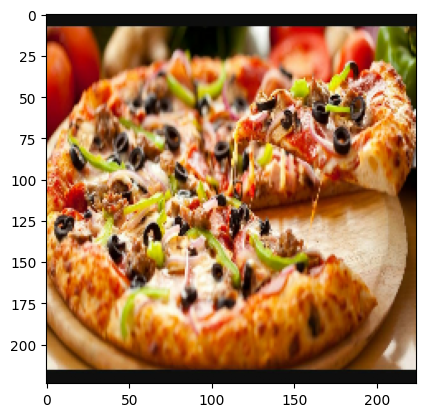

In [169]:
pizza_reshape2 = read_and_reshape_image('/content/image_pizza.jpeg')
print(pizza_reshape2.shape)
plt.imshow(pizza_reshape2)
p_predict = model_l.predict(tf.expand_dims(pizza_reshape2, axis = 0))
print(class_names[int(tf.round(p_predict))])

In [170]:
p_predict

array([[0.18880767]], dtype=float32)